In [1]:
import pandas as pd
import numpy as np
import re

In [3]:
#maximize the columns and rows
pd.set_option("display.max_columns",None)
pd.set_option("display.max_rows",None)

df = pd.read_csv("D:/Project/Car_Dheko/op/dropped_car_data_set.csv", low_memory=False)

In [5]:
df.shape

(8369, 48)

In [7]:
df.duplicated().sum()

88

In [9]:
df.drop_duplicates(inplace=True)

In [11]:
df.isnull().sum()

ft                        0
bt                        4
km                        0
transmission              0
ownerNo                   0
oem                       0
model                     0
centralVariantId          0
variantName               0
price                     0
Insurance Validity       56
Seats                    66
RTO                     905
Engine Displacement       0
Mileage                 284
Max Power               660
Torque                  668
Wheel Size             3218
Color                     3
Engine Type             290
Max Power_rpm           489
Max Torque              303
No of Cylinder           86
Values per Cylinder     315
Value Configuration    2225
Fuel Supply System     2570
Length                   79
Width                    83
Height                   83
Wheel Base              635
Front Tread            3946
Rear Tread             2561
Kerb Weight            3775
Gross Weight           6069
Gear Box                196
Drive Type          

In [13]:
def null_value_imputer(df):
    # Handling null values
    for i in df.columns:
        if (df[i].isnull().sum() / len(df)) * 100 >= 80:
            df.drop(i, axis=1, inplace=True)
        elif df[i].dtypes in ["int64", "float64"]:
            if df[i].skew() < 0.4 and df[i].skew() > -0.4:
                df[i].fillna(df[i].mean(), inplace=True)
            else:
                df[i].fillna(df[i].median(), inplace=True)
        else:
            df[i].fillna(df[i].mode()[0], inplace=True)

    print("Null values after imputation:\n", df.isnull().sum())

In [15]:
null_value_imputer(df)

Null values after imputation:
 ft                     0
bt                     0
km                     0
transmission           0
ownerNo                0
oem                    0
model                  0
centralVariantId       0
variantName            0
price                  0
Insurance Validity     0
Seats                  0
RTO                    0
Engine Displacement    0
Mileage                0
Max Power              0
Torque                 0
Wheel Size             0
Color                  0
Engine Type            0
Max Power_rpm          0
Max Torque             0
No of Cylinder         0
Values per Cylinder    0
Value Configuration    0
Fuel Supply System     0
Length                 0
Width                  0
Height                 0
Wheel Base             0
Front Tread            0
Rear Tread             0
Kerb Weight            0
Gross Weight           0
Gear Box               0
Drive Type             0
Steering Type          0
Turning Radius         0
Front Brake Type   

In [17]:
df.dtypes

ft                      object
bt                      object
km                       int64
transmission            object
ownerNo                  int64
oem                     object
model                   object
centralVariantId         int64
variantName             object
price                    int64
Insurance Validity      object
Seats                  float64
RTO                     object
Engine Displacement      int64
Mileage                float64
Max Power              float64
Torque                 float64
Wheel Size             float64
Color                   object
Engine Type             object
Max Power_rpm          float64
Max Torque             float64
No of Cylinder         float64
Values per Cylinder    float64
Value Configuration     object
Fuel Supply System      object
Length                 float64
Width                  float64
Height                 float64
Wheel Base             float64
Front Tread            float64
Rear Tread             float64
Kerb Wei

In [19]:
df = df.astype({'Seats': 'int', 'Wheel Size': 'int', 'Max Power_rpm': 'int', 'Max Torque': 'int', 'No of Cylinder': 'int',
                'Values per Cylinder': 'int', 'Length': 'int', 'Width': 'int', 'Height': 'int', 'Wheel Base': 'int', 'Front Tread': 'int', 
                'Rear Tread': 'int','Kerb Weight': 'int', 'Gross Weight': 'int', 'Alloy Wheel Size': 'int', 'No of Doors': 'int', 'Cargo Volume': 'int'})

In [21]:
df.dtypes

ft                      object
bt                      object
km                       int64
transmission            object
ownerNo                  int64
oem                     object
model                   object
centralVariantId         int64
variantName             object
price                    int64
Insurance Validity      object
Seats                    int32
RTO                     object
Engine Displacement      int64
Mileage                float64
Max Power              float64
Torque                 float64
Wheel Size               int32
Color                   object
Engine Type             object
Max Power_rpm            int32
Max Torque               int32
No of Cylinder           int32
Values per Cylinder      int32
Value Configuration     object
Fuel Supply System      object
Length                   int32
Width                    int32
Height                   int32
Wheel Base               int32
Front Tread              int32
Rear Tread               int32
Kerb Wei

In [23]:
df.shape

(8281, 48)

In [25]:
numeric_df = df.select_dtypes(exclude=['object'])  # Select only numeric columns

# Create an empty DataFrame to store the comparison table
comparison_table = pd.DataFrame()

# Loop through each numeric column and calculate the statistics
for col in numeric_df.columns:
    # Calculate statistics for each column
    mean_value = numeric_df[col].mean()
    median_value = numeric_df[col].median()
    mode_value = numeric_df[col].mode()[0]  # Get the first mode if multiple
    std_value = numeric_df[col].std()
    var_value = numeric_df[col].var()
    
    # Add the statistics to the comparison table
    comparison_table[col] = [mean_value, median_value, mode_value, std_value, var_value]

# Set the index to reflect the types of statistics
comparison_table.index = ['Mean', 'Median', 'Mode', 'Std', 'Variance']

# Transpose the table to have columns as rows for easier comparison
comparison_table = comparison_table.transpose()

# Display the comparison table
comparison_table
#here mean is more than median --> km, ownerNo, price, Seats, Engine Displacement, Mileage, Max power, Torque, Wheel size, height, length, wheel base, Frond Tread, 
#Rear Tread, kerb weight, gross weight, Turning Radius, Top speed, Alloy wheel size, cargo volume, car_age i.e. right skewed (postiviely skewed) affected large datasets
#here mean is less than median --> centralVariantId, Max power_rpm, Max Torque, No of cylinder, values per cylinder, width, Acceleration, No of doors i.e. left skewed (neg skewed) slightly affected datasets

,Mean,Median,Mode,Std,Variance
km,58970.734815,53700.00,120000.0,7.435738e+04,5.529019e+09
ownerNo,1.357324,1.00,1.0,6.379389e-01,4.069660e-01
centralVariantId,4965.956285,5327.00,10403.0,2.749260e+03,7.558432e+06
price,959565.677454,602000.00,650000.0,1.421871e+06,2.021716e+12
Seats,5.198285,5.00,5.0,6.505679e-01,4.232386e-01
Engine Displacement,0.891197,0.00,0.0,1.418774e+00,2.012919e+00
Mileage,19.234166,19.02,18.9,3.602057e+00,1.297482e+01
Max Power,102.527507,88.50,88.5,4.295307e+01,1.844966e+03
Torque,175.433543,140.00,140.0,1.022354e+02,1.045207e+04
Wheel Size,15.402608,15.00,15.0,1.202539e+00,1.446099e+00


In [27]:
#num_col selected only continous data
num_col = ['km', 'price', 'Mileage', 'Max Power', 'Torque', 'Max Power_rpm', 'Max Torque', 'Length', 'Width', 'Height', 'Wheel Base',
           'Front Tread', 'Rear Tread','Kerb Weight', 'Gross Weight','Top Speed', 'Cargo Volume']
# Removing outliers using IQR method
def remove_outliers(df):
    for col in num_col:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Filter the data to remove outliers
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
     
        print("Data after removing outliers:\n", df.describe())

    return df


In [29]:
df = remove_outliers(df)

Data after removing outliers:
                   km      ownerNo  centralVariantId         price  \
count    8233.000000  8233.000000       8233.000000  8.233000e+03   
mean    57082.021256     1.357099       4973.314102  9.602362e+05   
std     33034.348999     0.637366       2750.643762  1.424805e+06   
min         0.000000     0.000000          5.000000  2.016100e+04   
25%     30000.000000     1.000000       2042.000000  4.000000e+05   
50%     53165.000000     1.000000       5359.000000  6.020000e+05   
75%     80000.000000     2.000000       7122.000000  9.500000e+05   
max    154931.000000     5.000000      11098.000000  4.150000e+07   

             Seats  Engine Displacement      Mileage    Max Power  \
count  8233.000000          8233.000000  8233.000000  8233.000000   
mean      5.192518             0.890927    19.245552   102.473082   
std       0.641520             1.415933     3.590991    42.980252   
min       2.000000             0.000000     7.080000    34.200000   
25

In [31]:
df.shape

(876, 48)

In [33]:
from sklearn.preprocessing import LabelEncoder
enc = LabelEncoder()
for i in df.select_dtypes(include="object").columns:
    df[i]=enc.fit_transform(df[i])

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings(action = 'ignore')

In [37]:
# Set the style for the plots
sns.set(style="whitegrid")


# Box plot for 'price'
def plot_boxplot_price(df):
    plt.figure(figsize=(10, 4), 
                 layout='constrained')
    sns.boxplot(y=df['price'], color='lightgreen')
    plt.title('Box Plot of Car Prices')
    plt.ylabel('Price')
    plt.show()

# Histogram for 'Mileage'
def plot_histogram_mileage(df):
    plt.figure(figsize=(10, 4), 
                 layout='constrained')
    sns.histplot(df['Mileage'], bins=30, kde=True, color='red')
    plt.title('Histogram of Mileage')
    plt.xlabel('Mileage')
    plt.ylabel('Frequency')
    plt.show()

# Scatter plot comparing two specific columns
def plot_scatter_comparison(df, x_column, y_column):
    plt.figure(figsize=(10, 4), 
                 layout='constrained')
    sns.scatterplot(x=df[x_column], y=df[y_column], alpha=0.7, color='purple')
    plt.title(f'Scatter Plot of {x_column} vs. {y_column}')
    plt.xlabel(x_column)
    plt.ylabel(y_column)
    plt.show()



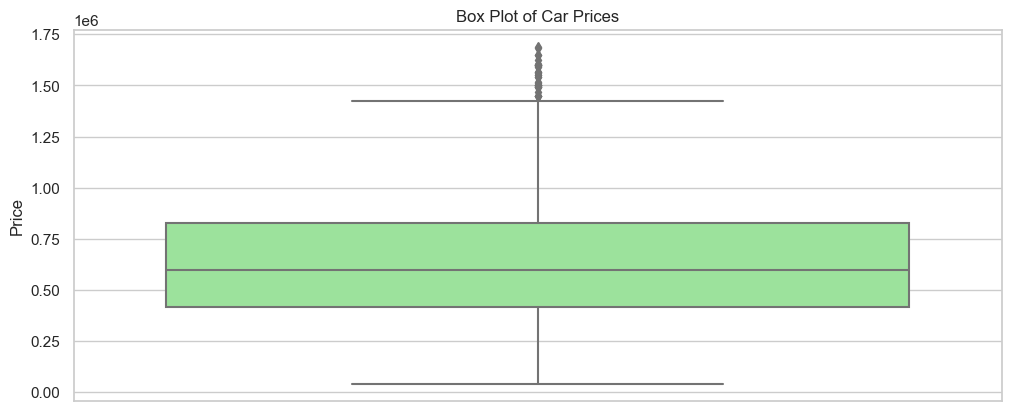

In [39]:
# Plot box plot for 'price'
plot_boxplot_price(df)

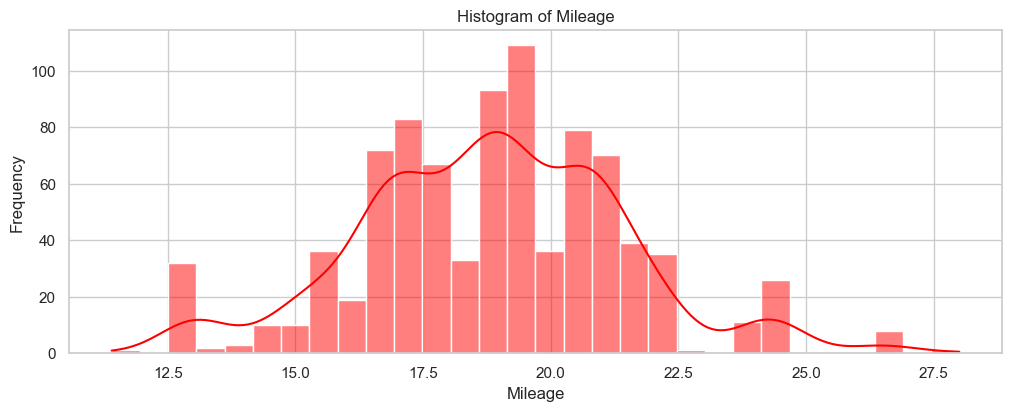

In [41]:
plot_histogram_mileage(df)

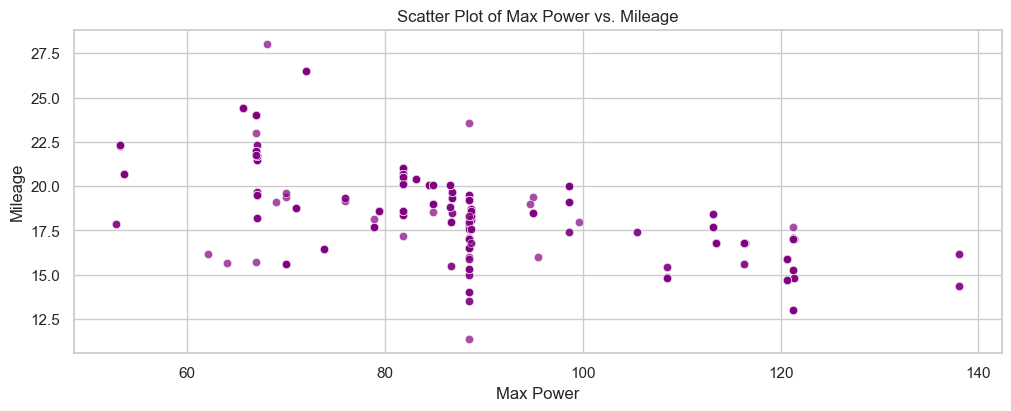

In [43]:
plot_scatter_comparison(df, 'Max Power', 'Mileage')

<Figure size 400x200 with 0 Axes>

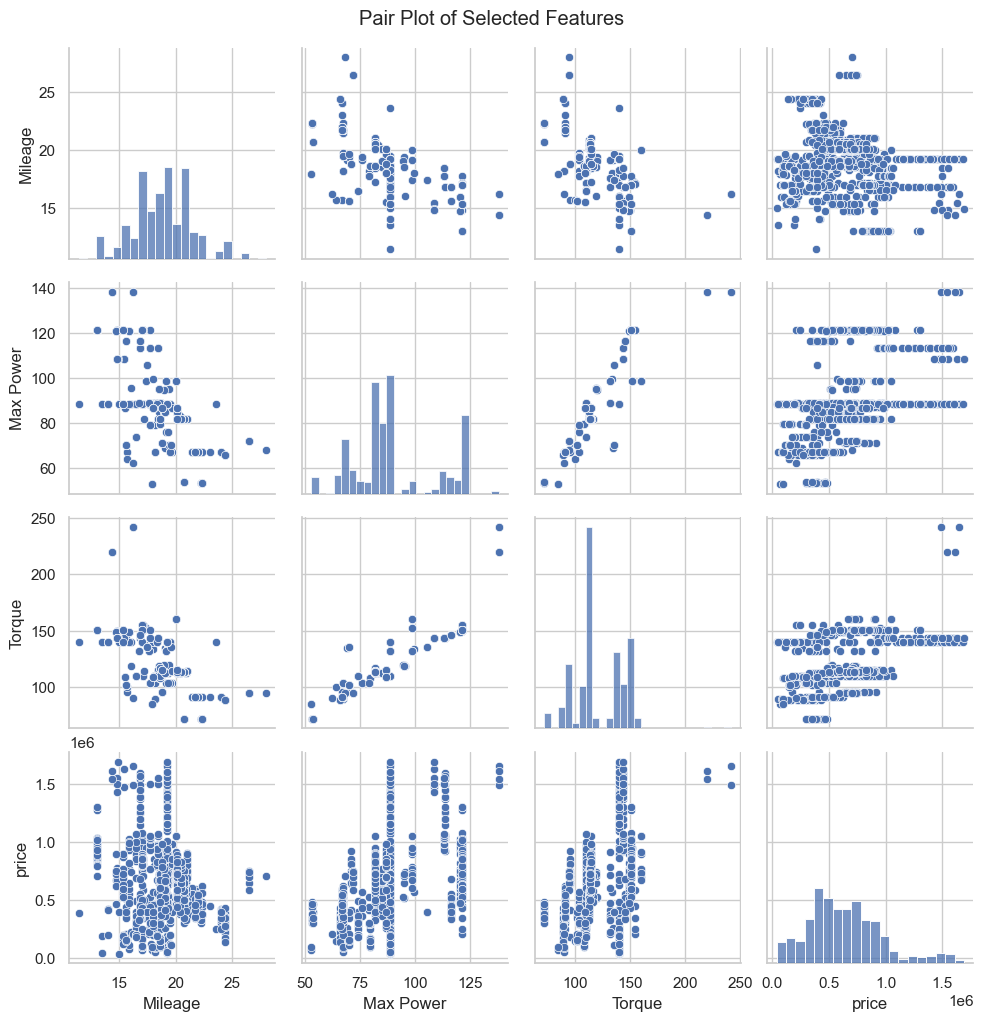

In [45]:
def plot_pairplot(df):
    plt.figure(figsize=(4, 2))
    sns.pairplot(df[['Mileage', 'Max Power', 'Torque', 'price']])
    plt.suptitle('Pair Plot of Selected Features', y=1.02)
    plt.show()

# Plot pair plot
plot_pairplot(df)

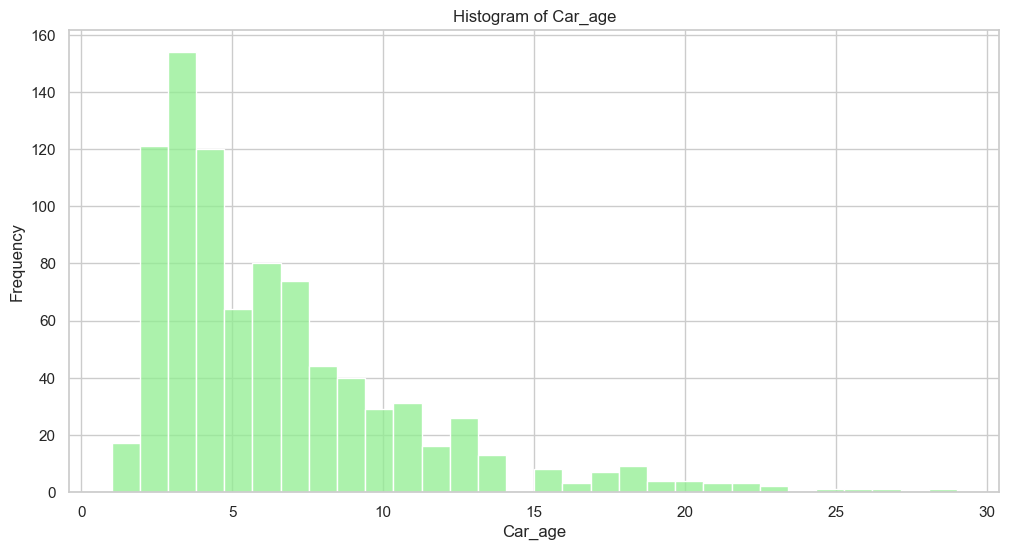

In [47]:
def plot_histogram(df, column_name, bins=30):
    plt.figure(figsize=(12, 6))
    sns.histplot(df[column_name], bins=bins, kde=False, color='lightgreen')
    plt.title(f'Histogram of {column_name}')
    plt.xlabel(column_name)
    plt.ylabel('Frequency')
    plt.show()

# Example histogram for 'car_age'
plot_histogram(df, 'Car_age')

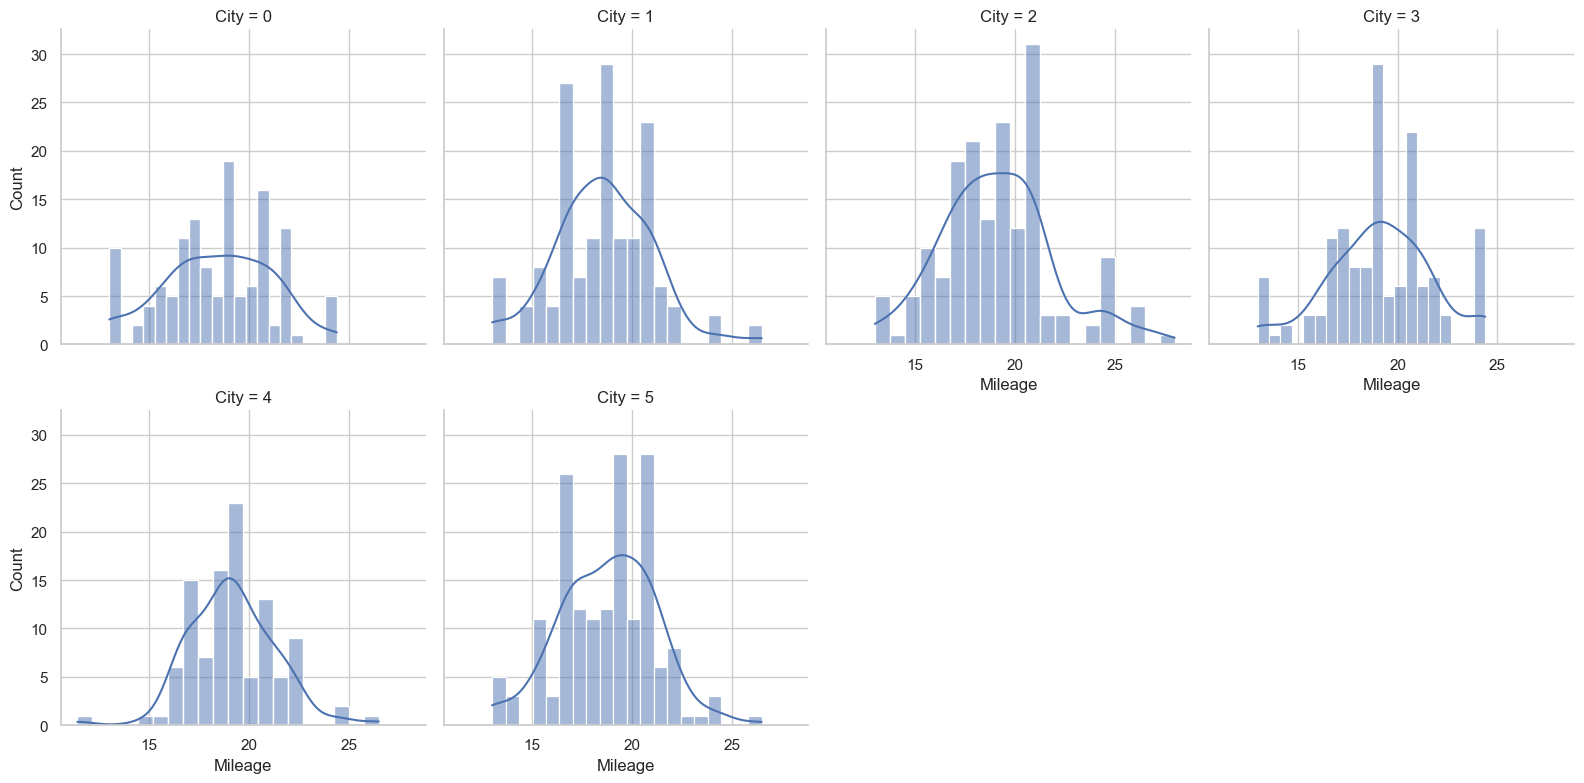

In [49]:
def plot_facet_grid(df, col):
    g = sns.FacetGrid(df, col=col, col_wrap=4, height=4)
    g.map(sns.histplot, 'Mileage', bins=20, kde=True)
    plt.show()

# Example facet grid for 'City'
plot_facet_grid(df, 'City')


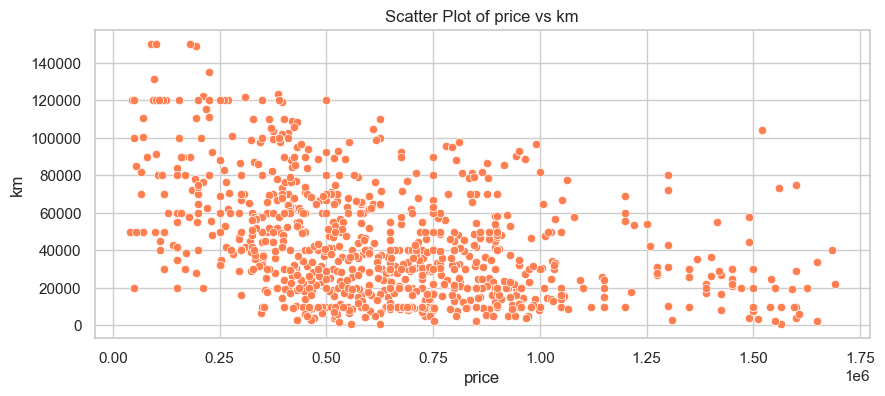

In [51]:
def plot_scatter(df, x_column, y_column):
    plt.figure(figsize=(10, 4))
    sns.scatterplot(x=df[x_column], y=df[y_column], color='coral')
    plt.title(f'Scatter Plot of {x_column} vs {y_column}')
    plt.xlabel(x_column)
    plt.ylabel(y_column)
    plt.show()

# Example scatter plot for 'price' vs 'km'
plot_scatter(df, 'price', 'km')

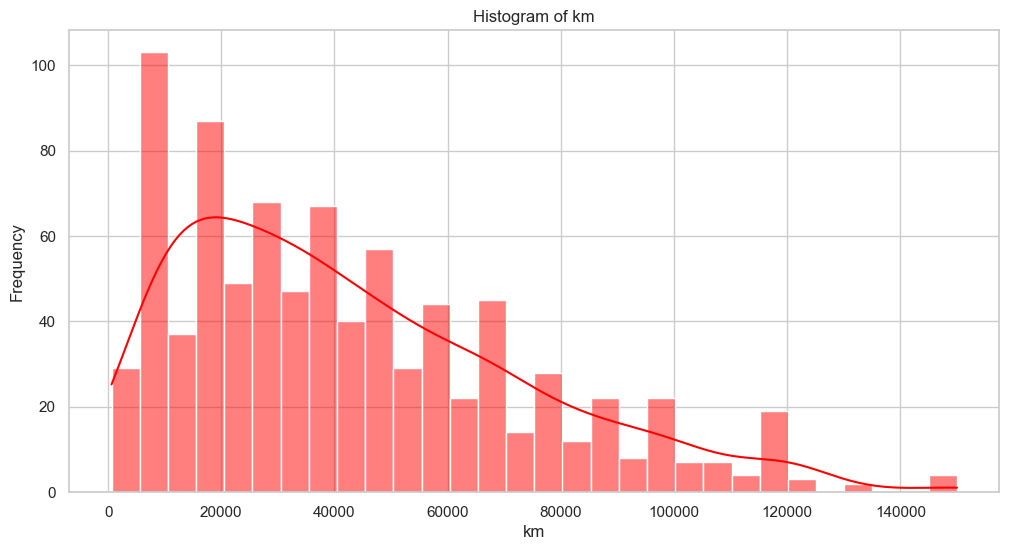

In [53]:
def plot_histogram(df, column_name):
    plt.figure(figsize=(12, 6))
    sns.histplot(df[column_name], bins=30, color='red', kde=True)  # You can adjust the number of bins
    plt.title(f'Histogram of {column_name}')
    plt.xlabel(column_name)
    plt.ylabel('Frequency')
    plt.show()

# Example histogram for 'km'
plot_histogram(df, 'km')

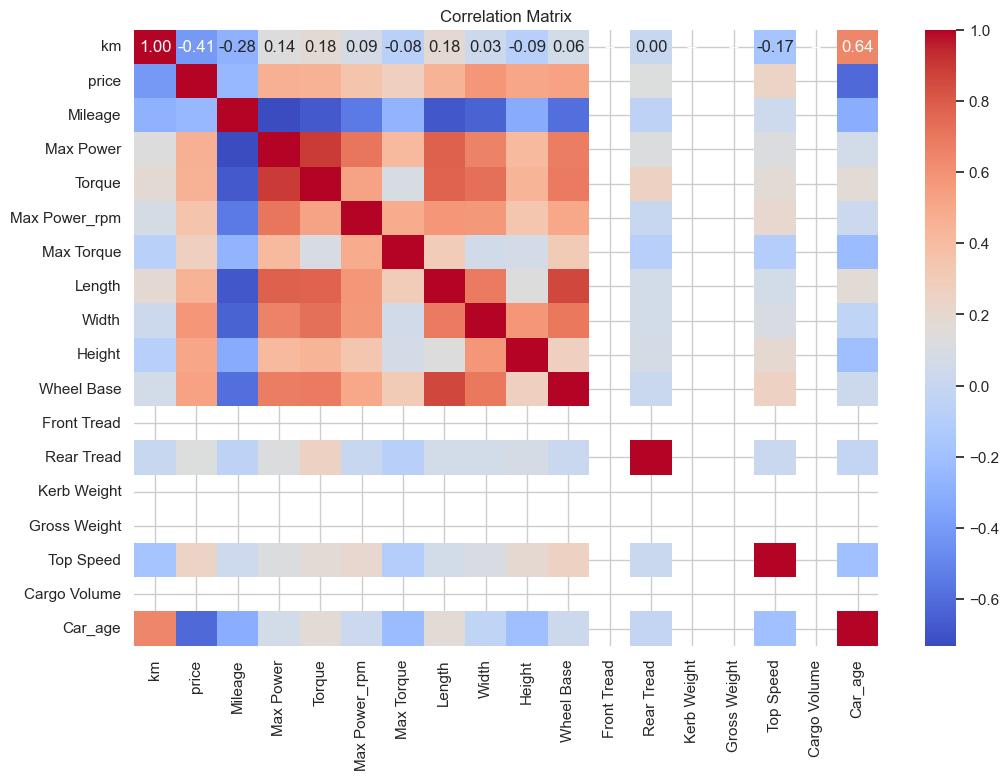

In [55]:

# Define the list of numerical columns
num_col = ['km', 'price','Mileage', 'Max Power', 'Torque', 'Max Power_rpm', 'Max Torque', 
           'Length', 'Width', 'Height', 'Wheel Base', 'Front Tread', 'Rear Tread', 
           'Kerb Weight', 'Gross Weight', 'Top Speed', 'Cargo Volume', 'Car_age']

# Filter DataFrame to include only numerical columns
df_num = df[num_col]

# Compute the correlation matrix
corr_matrix = df_num.corr()

# Plot the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()


In [57]:
from sklearn.preprocessing import MinMaxScaler

# List all columns of non-object types
non_object_columns = df.select_dtypes(exclude="object").columns

# Exclude the 'price' column if it is present
columns_excluding_price = [col for col in non_object_columns if col != 'price']

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Apply Min-Max scaling to the selected columns
for j in columns_excluding_price:
    df[[j]] = scaler.fit_transform(df[[j]])

In [59]:
# Separate features and target variable
x = df.drop(['price'], axis=1)
y = df['price']

# Compute correlation of each feature with the target variable
corr_target = df.corr()['price'].abs()

# Define a function to select features based on correlation with the target variable
def select_features_by_correlation(corr_series, threshold):
    return corr_series[corr_series > threshold].index.tolist()

# Set the correlation threshold
corr_threshold = 0.1

# Select features based on the correlation threshold (excluding 'price')
selected_features = [feature for feature in select_features_by_correlation(corr_target, corr_threshold) if feature != 'price']

# Add 'price' to the list of selected features
selected_features.append('price')

# Create a DataFrame with selected features
x_selected = df.loc[:, selected_features]


In [61]:
x_selected.to_csv("final_cleaned_car_dheko.csv", index=False)

In [63]:
df = pd.read_csv("final_cleaned_car_dheko.csv", low_memory = False)
df.describe()

,bt,km,transmission,ownerNo,oem,centralVariantId,variantName,Insurance Validity,Engine Displacement,Mileage,Max Power,Torque,Wheel Size,Max Power_rpm,Max Torque,No of Cylinder,Values per Cylinder,Length,Width,Height,Wheel Base,Rear Tread,Gear Box,Drive Type,Turning Radius,Top Speed,Acceleration,Car_age,price
count,876.000000,876.000000,876.000000,876.000000,876.000000,876.000000,876.000000,876.000000,876.000000,876.000000,876.000000,876.000000,876.000000,876.000000,876.000000,876.000000,876.000000,876.000000,876.000000,876.000000,876.000000,876.000000,876.000000,876.000000,876.000000,876.000000,876.000000,876.000000,8.760000e+02
mean,0.359589,0.286568,0.805936,0.255251,0.516767,0.536736,0.495937,0.703577,0.226712,0.448660,0.431111,0.290832,0.555651,0.714938,0.668546,0.657534,0.994292,0.535132,0.656060,0.508370,0.452229,0.002283,0.169977,0.997717,0.534189,0.761289,0.378757,0.186929,6.428854e+05
std,0.404587,0.203227,0.395704,0.111744,0.247938,0.261537,0.299146,0.352453,0.289818,0.155973,0.218879,0.135947,0.169367,0.166414,0.221739,0.474806,0.075377,0.246213,0.222439,0.254876,0.218397,0.047755,0.168965,0.047755,0.197627,0.227020,0.110647,0.157777,3.319514e+05
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000e+04
25%,0.000000,0.129853,1.000000,0.200000,0.375000,0.357936,0.203061,0.333333,0.000000,0.337349,0.340056,0.217647,0.500000,0.714286,0.464286,0.000000,1.000000,0.323529,0.588235,0.340611,0.274390,0.000000,0.100000,1.000000,0.400000,0.841270,0.360231,0.071429,4.150000e+05
50%,0.000000,0.243270,1.000000,0.200000,0.375000,0.638713,0.524490,1.000000,0.000000,0.458133,0.397514,0.245882,0.500000,0.714286,0.714286,1.000000,1.000000,0.547059,0.634675,0.449782,0.472561,0.000000,0.100000,1.000000,0.600000,0.841270,0.360231,0.142857,5.990000e+05
75%,0.500000,0.399327,1.000000,0.200000,0.750000,0.710631,0.783673,1.000000,0.600000,0.560241,0.537406,0.400000,0.500000,0.857143,0.821429,1.000000,1.000000,0.656863,0.829721,0.733624,0.625000,0.000000,0.100000,1.000000,0.600000,0.841270,0.360231,0.250000,8.289990e+05
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.689999e+06


In [65]:
from sklearn.model_selection import train_test_split, GridSearchCV
import pandas as pd

df = pd.read_csv("final_cleaned_car_dheko.csv", low_memory = False)
required_columns = ['bt', 'km', 'transmission', 'oem', 'variantName', 'Insurance Validity', 'Engine Displacement', 'Mileage', 'Drive Type', 'Car_age', 'price']

df = df[required_columns]

features = df.drop(['price'], axis=1) 
target = df['price'] 

#Split the data into training and testing sets
# We use 80% of the data for training and 20% for testing
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)


In [67]:
# Print shapes of the resulting datasets
print(f"Training set features shape: {x_train.shape}")
print(f"Testing set features shape: {x_test.shape}")
print(f"Training set target shape: {y_train.shape}")
print(f"Testing set target shape: {y_test.shape}")

Training set features shape: (700, 10)
Testing set features shape: (176, 10)
Training set target shape: (700,)
Testing set target shape: (176,)


Linear Regression:
Mean Absolute Error (MAE): 156168.16
Mean Squared Error (MSE): 45185925152.30
R-squared (R2): 0.64


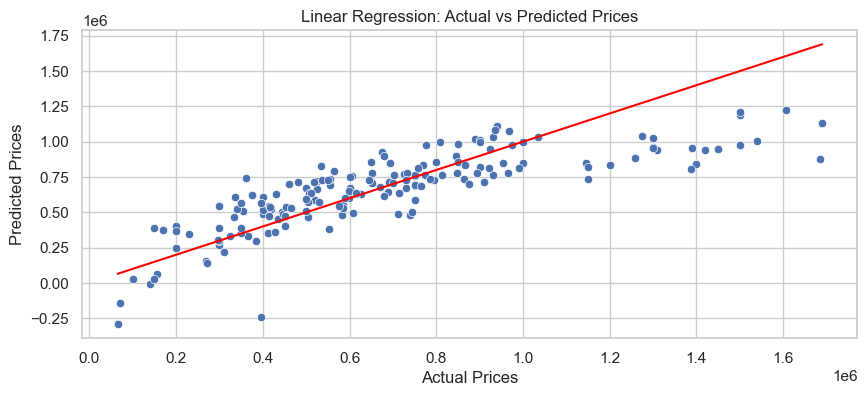

Best Ridge Alpha: {'alpha': 0.1}
Best Lasso Alpha: {'alpha': 100}


In [69]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# Initialize the model
model = LinearRegression()

# Train the model
model.fit(x_train, y_train)

# Make predictions
y_pred = model.predict(x_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Linear Regression:")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared (R2): {r2:.2f}")

# Plotting Actual vs Predicted
plt.figure(figsize=(10, 4))
sns.scatterplot(x = y_test, y = y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Linear Regression: Actual vs Predicted Prices')
plt.show()


# Hyperparameter Tuning for Ridge and Lasso using Grid Search
ridge = Ridge()
ridge_params = {'alpha': [0.01, 0.1, 1, 10, 100]}
ridge_grid = GridSearchCV(ridge, ridge_params, cv=5, scoring='neg_mean_squared_error')
ridge_grid.fit(x_train, y_train)
print(f'Best Ridge Alpha: {ridge_grid.best_params_}')

lasso = Lasso()
lasso_params = {'alpha': [0.01, 0.1, 1, 10, 100]}
lasso_grid = GridSearchCV(lasso, lasso_params, cv=5, scoring='neg_mean_squared_error')
lasso_grid.fit(x_train, y_train)
print(f'Best Lasso Alpha: {lasso_grid.best_params_}')

Decision Tree Regressor:
Mean Absolute Error (MAE): 93931.84
Mean Squared Error (MSE): 17812777204.60
R-squared (R2): 0.86


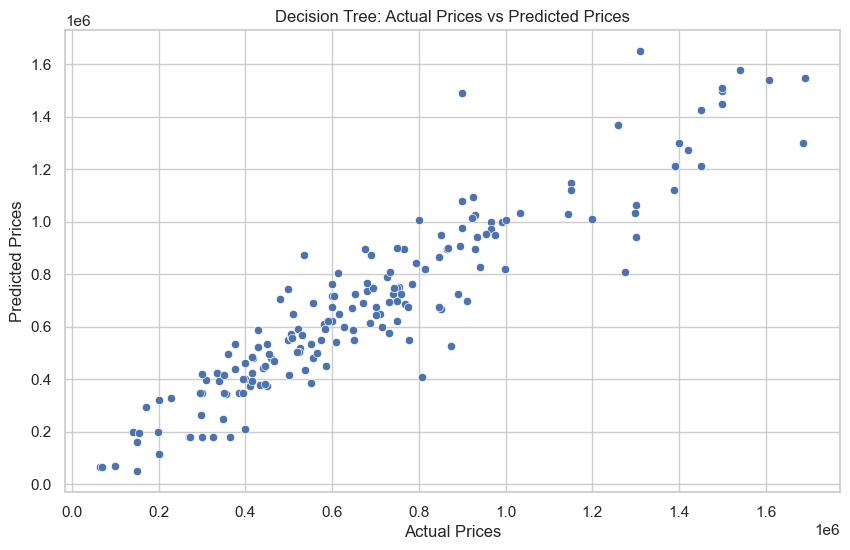

Best Decision Tree Params: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 10}


In [71]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Initialize the model
model = DecisionTreeRegressor()

# Train the model
model.fit(x_train, y_train)

# Make predictions
y_pred = model.predict(x_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Decision Tree Regressor:")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared (R2): {r2:.2f}")

# Plotting Actual vs Predicted
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Decision Tree: Actual Prices vs Predicted Prices')
plt.show()

# Hyperparameter Tuning using Grid Search
params = {
    'max_depth': [3, 5, 7, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
grid = GridSearchCV(DecisionTreeRegressor(random_state=42), params, cv=5, scoring='neg_mean_squared_error')
grid.fit(x_train, y_train)

print(f'Best Decision Tree Params: {grid.best_params_}')

Random Forest Regressor:
Mean Absolute Error (MAE): 85281.01
Mean Squared Error (MSE): 14957286200.49
R-squared (R2): 0.88


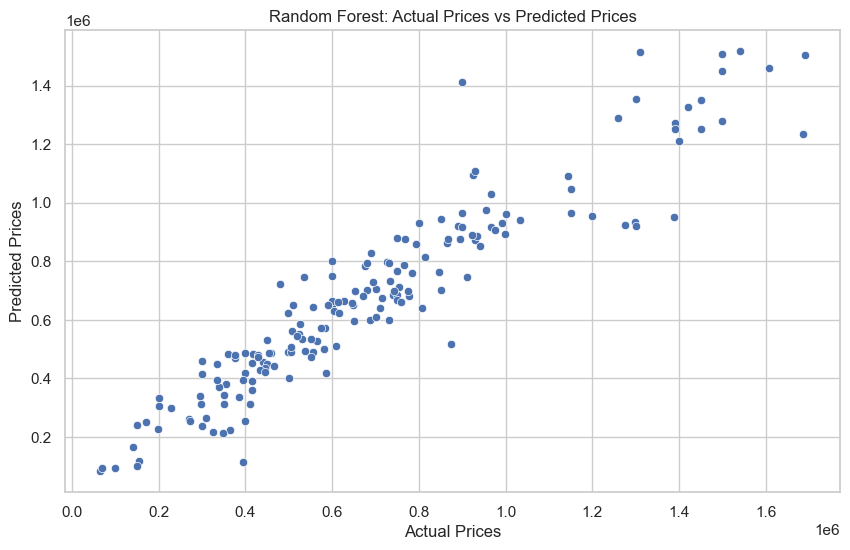

Best Random Forest Params: {'n_estimators': 300, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_depth': 20, 'bootstrap': True}


In [73]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import RandomizedSearchCV
# Initialize the model
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
model.fit(x_train, y_train)

# Make predictions
y_pred = model.predict(x_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Random Forest Regressor:")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared (R2): {r2:.2f}")

# Plotting Actual vs Predicted
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Random Forest: Actual Prices vs Predicted Prices')
plt.show()

# Hyperparameter Tuning using Random Search
params = {
    'n_estimators': [100, 200, 300, 400],
    'max_depth': [10, 20, 30, 40],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}
random = RandomizedSearchCV(model, params, n_iter=20, cv=5, scoring='neg_mean_squared_error', random_state=42)
random.fit(x_train, y_train)

print(f'Best Random Forest Params: {random.best_params_}')

Gradient Boosting Regressor:
Mean Absolute Error (MAE): 82183.24
Mean Squared Error (MSE): 13442871316.34
R-squared (R2): 0.89


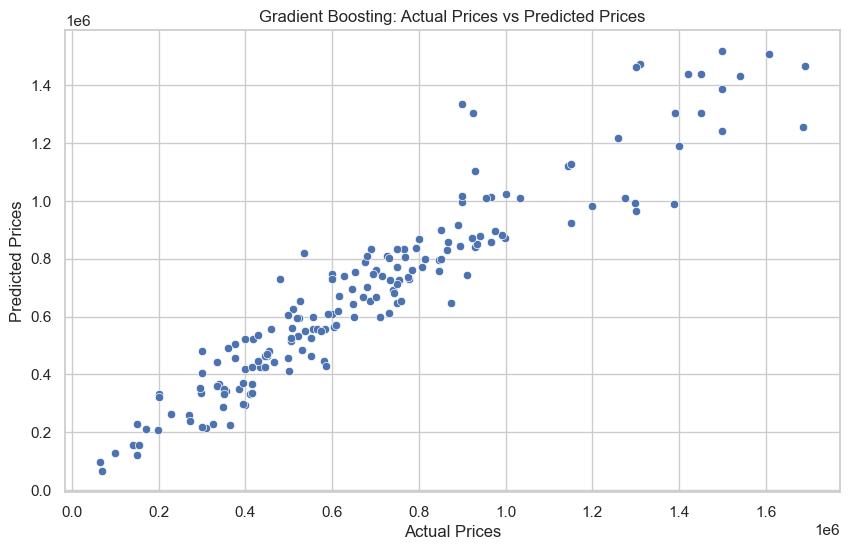

Best Gradient Boosting Params: {'subsample': 0.8, 'n_estimators': 300, 'max_depth': 5, 'learning_rate': 0.05}


In [74]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import RandomizedSearchCV

# Initialize the model
model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)

# Train the model
model.fit(x_train, y_train)

# Make predictions
y_pred = model.predict(x_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Gradient Boosting Regressor:")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared (R2): {r2:.2f}")


# Plotting Actual vs Predicted
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Gradient Boosting: Actual Prices vs Predicted Prices')
plt.show()

# Hyperparameter Tuning using Random Search
params = {
    'n_estimators': [100, 200, 300, 400],
    'max_depth': [3, 5, 7, 10],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'subsample': [0.8, 0.9, 1.0]
}
random = RandomizedSearchCV(model, params, n_iter=20, cv=5, scoring='neg_mean_squared_error', random_state=42)
random.fit(x_train, y_train)

print(f'Best Gradient Boosting Params: {random.best_params_}')

In [77]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import make_scorer, mean_absolute_error, mean_squared_error, r2_score

# Separate features and target variable
x = df.drop(['price'], axis=1)
y = df['price']

# Define the models
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree Regressor': DecisionTreeRegressor(),
    'Random Forest Regressor': RandomForestRegressor(),
    'Gradient Boosting Regressor': GradientBoostingRegressor(),
}

# Define the cross-validation procedure
cv_folds = 5  # Number of folds for cross-validation
scoring = {
    'MAE': make_scorer(mean_absolute_error),
    'MSE': make_scorer(mean_squared_error),
    'R2': make_scorer(r2_score)
}

# Initialize dictionary to store results
results = {}
best_model = None
best_mse = float('inf')  # Initialize to infinity for comparison
best_metrics = {}

# Train and evaluate each model
for name, model in models.items():
    print(f"Training and evaluating {name}...")
    
    # Perform cross-validation and store results
    cv_results = {}
    for metric, scorer in scoring.items():
        scores = cross_val_score(model, x, y, cv=cv_folds, scoring=scorer)
        cv_results[metric] = scores.mean()
    
    results[name] = cv_results
    
    # Update best model based on MSE (you can change this to another metric if needed)
    if cv_results['MSE'] < best_mse:
        best_mse = cv_results['MSE']
        best_model = name
        best_metrics = cv_results

# Print all results
for name, metrics in results.items():
    print(f"{name}:")
    for metric, score in metrics.items():
        print(f"  {metric}: {score:.2f}")
    print()

# Print the best model and its metrics
print(f"Best Model: {best_model}")
print(f"  Mean Absolute Error (MAE): {best_metrics['MAE']:.2f}")
print(f"  Mean Squared Error (MSE): {best_metrics['MSE']:.2f}")
print(f"  R-squared (R2): {best_metrics['R2']:.2f}")


Training and evaluating Linear Regression...
Training and evaluating Decision Tree Regressor...
Training and evaluating Random Forest Regressor...
Training and evaluating Gradient Boosting Regressor...
Linear Regression:
  MAE: 152622.08
  MSE: 42914002503.20
  R2: 0.60

Decision Tree Regressor:
  MAE: 125503.28
  MSE: 33832258750.90
  R2: 0.68

Random Forest Regressor:
  MAE: 99997.69
  MSE: 20348704239.38
  R2: 0.82

Gradient Boosting Regressor:
  MAE: 95398.07
  MSE: 18230251159.10
  R2: 0.83

Best Model: Gradient Boosting Regressor
  Mean Absolute Error (MAE): 95398.07
  Mean Squared Error (MSE): 18230251159.10
  R-squared (R2): 0.83


Fitting 5 folds for each of 729 candidates, totalling 3645 fits
Best Hyperparameters: {'learning_rate': 0.1, 'max_depth': 5, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 200}
R2 Score: 0.8874481233877703
RMSE: 119317.30619592845
Model saved to D:/Project/Car_Dheko/op/gradient_boosting_model.pkl using pickle.


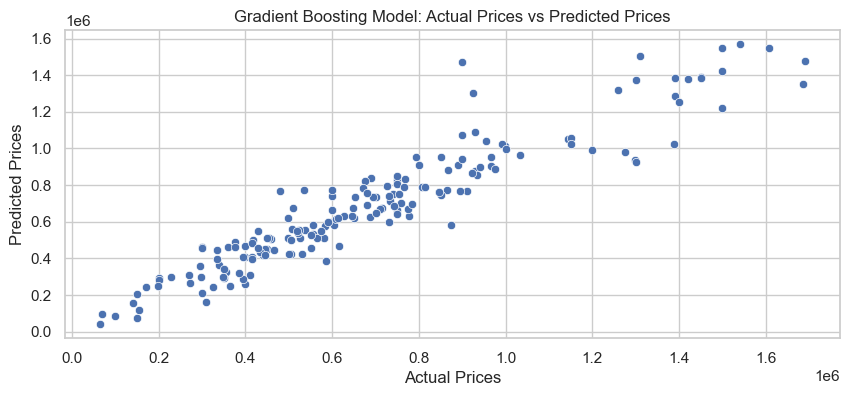

In [79]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import StandardScaler
import pickle
import matplotlib.pyplot as plt
import seaborn as sns



# Step 1: Feature Engineering

# Create a new feature 'km_per_year' by dividing 'km' by 'car_age'
# Handle division by zero: Set km_per_year to NaN where 'Car_age' is 0
df['km_per_year'] = df['km'] / df['Car_age'].replace(0, np.nan)

# Interaction feature: Create a feature by multiplying 'Engine Displacement' with 'Mileage'
df['Engine_displacement_mileage'] = df['Engine Displacement'] * df['Mileage']

# Log transformation: Apply log transformation to 'km' to reduce skewness, checking for negative or zero values
df['log_km'] = np.log1p(df['km'].replace(0, np.nan))

# Drop the original 'km' column after log transformation
df = df.drop(columns=['km'])

# Define features and target variable in the specified order
required_columns = ['bt', 'transmission', 'oem', 'variantName', 'Insurance Validity', 'Engine Displacement', 'Mileage', 'Drive Type', 'Car_age', 
                    'price', 'km_per_year', 'Engine_displacement_mileage', 'log_km']

df = df[required_columns]

# Step 2: Check for and handle NaN or infinite values
df.replace([np.inf, -np.inf], np.nan, inplace=True)

# Impute missing values with the mean
imputer = SimpleImputer(strategy='mean')
X = imputer.fit_transform(df.drop(['price'], axis=1))  # Features
y = df['price']  # Target variable

# Step 3: Scaling
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Step 4: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 5: Model Training with Hyperparameter Tuning
gbr = GradientBoostingRegressor(random_state=42)

# Define the hyperparameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None]
}

# Perform GridSearchCV to find the best hyperparameters
grid_search = GridSearchCV(estimator=gbr, param_grid=param_grid, cv=5, n_jobs=-1, scoring='r2', verbose=2)
grid_search.fit(X_train, y_train)

# Get the best model from GridSearchCV
best_model = grid_search.best_estimator_

# Step 6: Model Evaluation
y_pred = best_model.predict(X_test)

# Evaluate the model
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"Best Hyperparameters: {grid_search.best_params_}")
print(f"R2 Score: {r2}")
print(f"RMSE: {rmse}")

# Save the model
output_path = "D:/Project/Car_Dheko/op/gradient_boosting_model.pkl"

# Save the model
with open(output_path, 'wb') as f:
    pickle.dump(best_model, f)

print(f"Model saved to {output_path} using pickle.")

# Plotting Actual vs Predicted
plt.figure(figsize=(10, 4))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Gradient Boosting Model: Actual Prices vs Predicted Prices')
plt.show()

# To load the model later:
# with open(output_path, 'rb') as f:
#     loaded_model = pickle.load(f)
